In [3]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

	if '%s/uoicorr' % p not in sys.path:
	    sys.path.append('%s/uoicorr' % p)
else:
	# And standard list of subdirectories
	if '%s\\pyuoi' % p not in sys.path:
		sys.path.append('%s\\pyuoi' % p)
	if '%s\\uoicorr' % p not in sys.path:
	    sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [7]:
data = postprocess_dir('/home/akumar/nse/uoicorr/data/01222019c')

(1250, 23)


In [42]:
data.iloc[0]

beta_hats               [[7.523628272389248, 0.0, -3.0498745903859947,...
betadist                                                          uniform
betas                   [[7.407269780173618, 0.542752401724288, 0.0, 0...
block_size                                                              6
cov_params                                           {'correlation': 0.6}
cov_type                                                            block
est_score                                                              r2
exp_type                                                         UoILasso
fn                      [5.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 5.0, 6.0, ...
fp                      [9.0, 6.0, 7.0, 9.0, 5.0, 11.0, 8.0, 9.0, 4.0,...
kappa                                                                 0.3
l1_ratios                          [0.1, 0.2, 0.5, 0.75, 0.9, 0.95, 0.99]
n_alphas                                                               48
n_boots_est                           

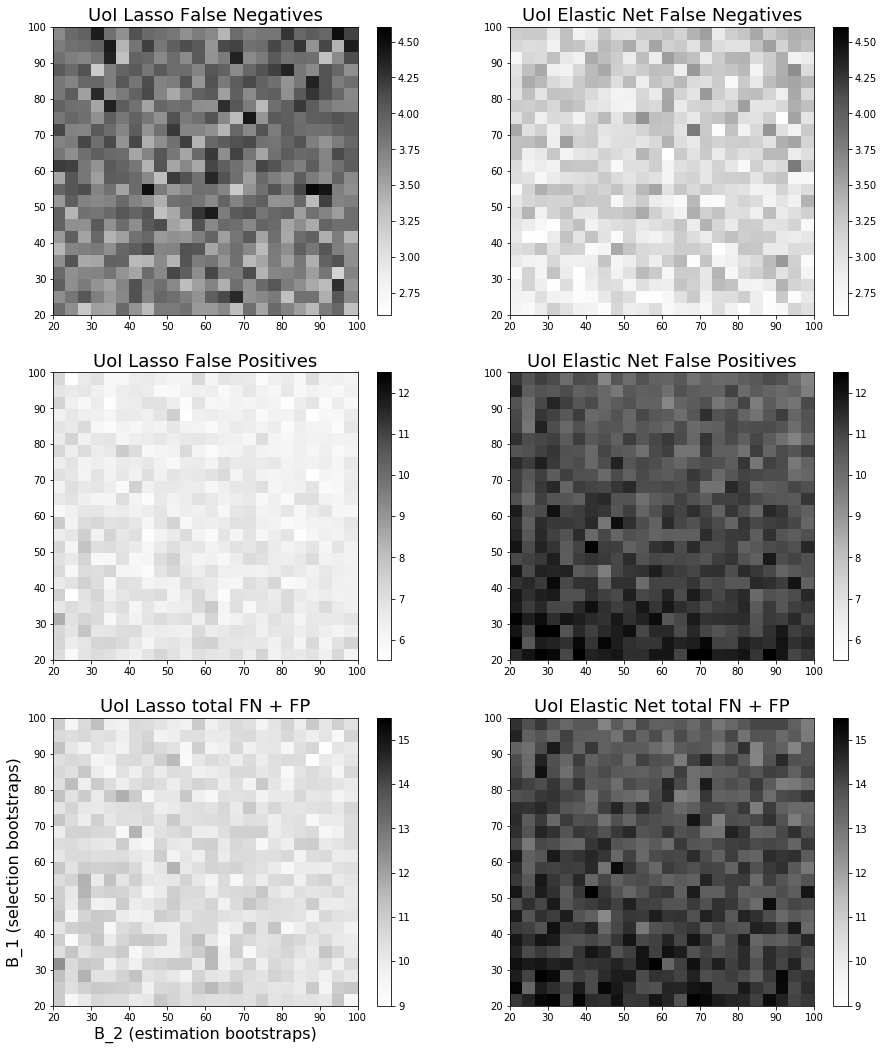

In [41]:
# Make a heatmap of false negatives and false positives
fp_uoi = np.zeros((25, 25))
fp_en = np.zeros((25, 25))

fn_uoi = np.zeros((25, 25))
fn_en = np.zeros((25, 25))

datuoi = data.loc[data['exp_type'] == 'UoILasso']
daten = data.loc[data['exp_type'] == 'UoIElasticNet']

nbootssel =  np.linspace(20, 100, 25)
nbootsest =  np.linspace(20, 100, 25)

for i in range(25):
    for j in range(25):
        d1 = datuoi.loc[(datuoi['n_boots_sel'] == nbootssel[i]) & (datuoi['n_boots_est'] == nbootsest[j])]
        d2 = daten.loc[(daten['n_boots_sel'] == nbootssel[i]) & (daten['n_boots_est'] == nbootsest[j])]
        
        fp_uoi[i, j] = np.mean(d1.iloc[0].fp)
        fp_en[i, j] = np.mean(d2.iloc[0].fp)
        
        fn_uoi[i, j] = np.mean(d1.iloc[0].fn)
        fn_en[i, j] = np.mean(d2.iloc[0].fn)

fig, ax = plt.subplots(3, 2, figsize = (15, 18))


p1 = ax[0, 0].pcolor(nbootsest, nbootssel, fn_uoi, cmap = 'Greys', vmin = 2.6, vmax = 4.6)
ax[0, 0].set_title('UoI Lasso False Negatives', fontsize = 18)
fig.colorbar(p1, ax = ax[0, 0])

p2 = ax[0, 1].pcolor(nbootsest, nbootssel, fn_en, cmap = 'Greys', vmin = 2.6, vmax = 4.6)
ax[0, 1].set_title('UoI Elastic Net False Negatives', fontsize = 18)
fig.colorbar(p2, ax = ax[0, 1])

p3 = ax[1, 0].pcolor(nbootsest, nbootssel, fp_uoi, cmap = 'Greys', vmin = 5.5, vmax = 12.5)
ax[1, 0].set_title('UoI Lasso False Positives', fontsize = 18)
fig.colorbar(p3, ax=ax[1, 0])

p4 = ax[1, 1].pcolor(nbootsest, nbootssel, fp_en, cmap = 'Greys', vmin = 5.5, vmax = 12.5)
ax[1, 1].set_title('UoI Elastic Net False Positives', fontsize = 18)
fig.colorbar(p4, ax=ax[1, 1])


p5 = ax[2, 0].pcolor(nbootsest, nbootssel, fn_uoi + fp_uoi, cmap = 'Greys', vmin = 9, vmax = 15.5)
ax[2, 0].set_title('UoI Lasso total FN + FP', fontsize = 18)
fig.colorbar(p5, ax = ax[2, 0])

p6 = ax[2, 1].pcolor(nbootsest, nbootssel, fn_en + fp_en, cmap = 'Greys', vmin = 9, vmax = 15.5)
ax[2, 1].set_title('UoI Elastic Net total FN + FP', fontsize = 18)
fig.colorbar(p6, ax = ax[2, 1])

for i in range(6):
    a.set_xticks(nbootsest.astype(int)[0::2])
    a.set_yticks(nbootssel.astype(int)[0::2])

a = ax[2, 0]
a.set_xlabel('B_2 (estimation bootstraps)', fontsize = 16)
a.set_ylabel('B_1 (selection bootstraps)', fontsize = 16)

plt.savefig('../figs/01232019/nboots.png')